Accuracy: 0.5193621867881549


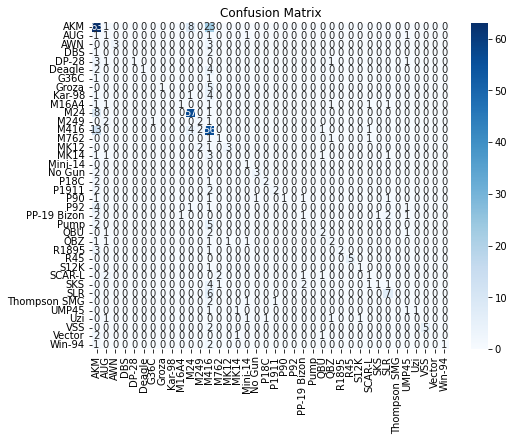

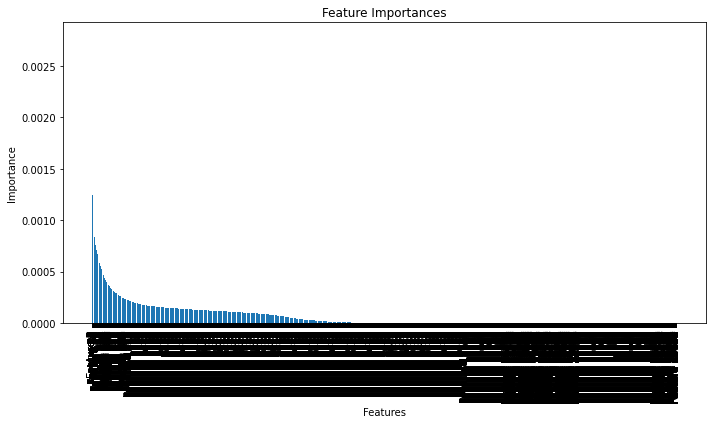

In [ ]:
import os
import librosa
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to extract audio features
def extract_audio_features(audio):
    # Extract MFCCs (Mel-frequency cepstral coefficients) as audio features
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    return mfccs.flatten()  # Flatten the MFCCs array to obtain a single-dimensional feature vector

# Step 1: Load and Preprocess the Data

dataset_folder = "C:/Users/Aishwarya/Dataset_wav"  # Replace with the path to your dataset folder
gun_types = os.listdir(dataset_folder)

audio_features = []
labels = []

max_feature_length = 0  # Maximum length of audio features

for gun_type in gun_types:
    gun_folder = os.path.join(dataset_folder, gun_type)
    audio_files = os.listdir(gun_folder)

    for audio_file in audio_files:
        file_path = os.path.join(gun_folder, audio_file)
        audio, sr = librosa.load(file_path, sr=None)

        # Extract audio features
        audio_feature = extract_audio_features(audio)

        audio_features.append(audio_feature)
        labels.append(gun_type)

        # Update the maximum feature length
        if len(audio_feature) > max_feature_length:
            max_feature_length = len(audio_feature)

audio_features = pad_sequences(audio_features, maxlen=max_feature_length, padding='post', dtype=np.float32)
labels = np.array(labels)

# Step 2: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(audio_features, labels, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest Model

n_estimators = 500  # Increase the number of estimators
random_state = 42  # Random state for reproducibility

rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
rf_model.fit(X_train, y_train)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Step 4: Predict and Evaluate

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Step 5: Plot the Confusion Matrix

# Get the unique class labels
class_labels = np.unique(labels)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=class_labels)

# Create a figure and axes for the confusion matrix
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Show the confusion matrix plot
plt.show()

# Step 6: Plot the Feature Importances

# Get the feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Sort the feature importances and corresponding feature names in descending order
indices = np.argsort(importances)[::-1]
sorted_features = [f"Feature {i+1}" for i in range(len(importances))]

# Create a figure and axes for the feature importances plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), sorted_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()

# Show the feature importances plot
plt.show()

In [ ]:

# Step 7: Print Model Summary and Parameter Details
print("Random Forest Model Summary:")
print(rf_model)

# Get the parameter details
params = rf_model.get_params()
print("\nRandom Forest Model Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")


Random Forest Model Summary:
RandomForestClassifier(n_estimators=500, random_state=42)

Random Forest Model Parameters:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 500
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


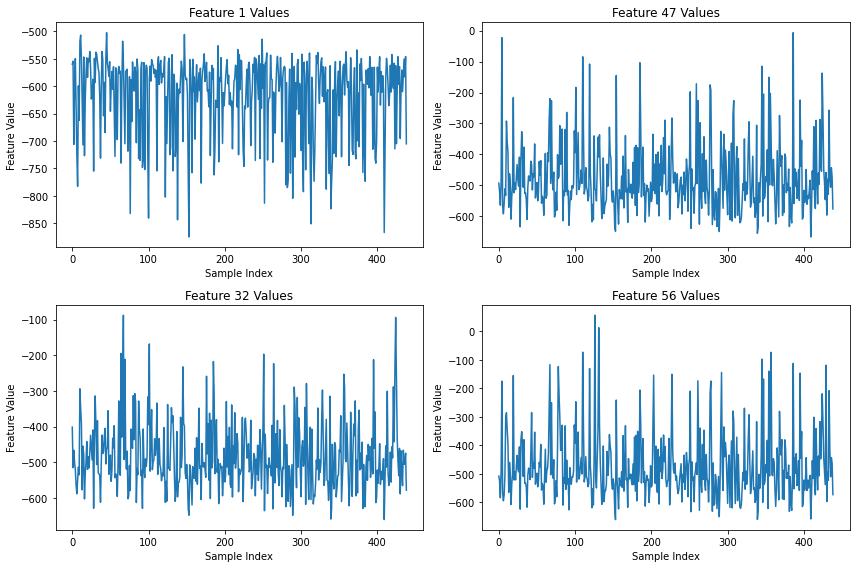

In [ ]:
# Step 8: Plot the 4 Most Important Features
# Select the top 4 important features
top_features_indices = indices[:4]
top_features_names = [sorted_features[i] for i in top_features_indices]

# Plot the values of the top 4 features for each sample in the test set
plt.figure(figsize=(12, 8))
for i, feature_index in enumerate(top_features_indices):
    plt.subplot(2, 2, i+1)
    plt.title(f"{top_features_names[i]} Values")
    plt.xlabel("Sample Index")
    plt.ylabel("Feature Value")
    plt.plot(X_test[:, feature_index])
plt.tight_layout()
plt.show()


In [ ]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Random Forest Model Summary:
RandomForestClassifier(n_estimators=500, random_state=42)

Random Forest Model Parameters:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 500
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False

Top 4 Features:
Feature 1
Feature 47
Feature 32
Feature 56


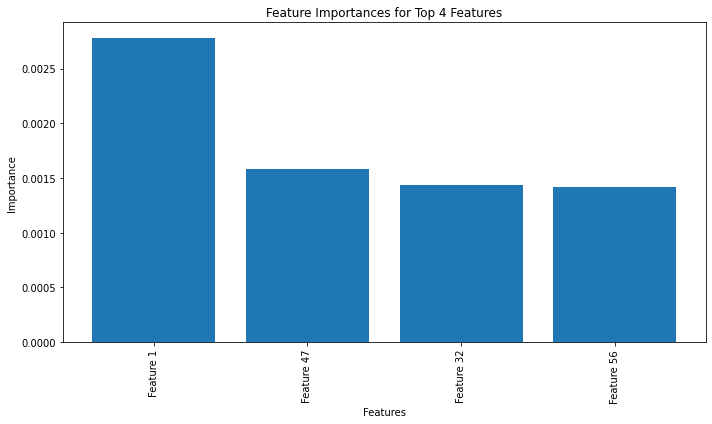

+------------+-------------+--------------+--------------+--------------+
| Sample     |  Feature 1  |  Feature 47  |  Feature 32  |  Feature 56  |
+============+=============+==============+==============+==============+
| Sample 0   |  -559.925   |   -492.566   |   -401.596   |   -508.011   |
+------------+-------------+--------------+--------------+--------------+
| Sample 1   |  -554.323   |   -520.082   |   -515.371   |   -524.439   |
+------------+-------------+--------------+--------------+--------------+
| Sample 2   |   -706.19   |   -563.933   |   -466.665   |   -584.242   |
+------------+-------------+--------------+--------------+--------------+
| Sample 3   |  -599.782   |   -491.257   |   -499.936   |   -491.522   |
+------------+-------------+--------------+--------------+--------------+
| Sample 4   |  -549.658   |   -22.7861   |   -520.297   |   -174.666   |
+------------+-------------+--------------+--------------+--------------+
| Sample 5   |  -632.846   |   -567.75

In [ ]:
# Step 7: Print Model Summary and Parameter Details
print("Random Forest Model Summary:")
print(rf_model)

# Get the parameter details
params = rf_model.get_params()
print("\nRandom Forest Model Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")

# Step 8: Plot the Feature Importances
# Select the top 4 important features
top_features_indices = indices[:4]
top_features_names = [sorted_features[i] for i in top_features_indices]

# Print the names of the top 4 features
print("\nTop 4 Features:")
for feature_name in top_features_names:
    print(feature_name)

# Plot the feature importances for the top 4 features
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Top 4 Features")
plt.bar(range(len(top_features_indices)), importances[top_features_indices], align="center")
plt.xticks(range(len(top_features_indices)), top_features_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

from tabulate import tabulate
# ... (Previous code)

# Step 9: Print the Value of Each Sample for the Top 4 Features
table_data = []
header = ["Sample"]
header.extend(top_features_names)

for sample_index in range(len(X_test)):
    row_data = [f"Sample {sample_index}"]
    for feature_index in top_features_indices:
        row_data.append(f"{X_test[sample_index, feature_index]:.4f}")
    table_data.append(row_data)

# Print the table
print(tabulate(table_data, headers=header, tablefmt="grid", numalign="center"))






Predicted Class Label: Groza


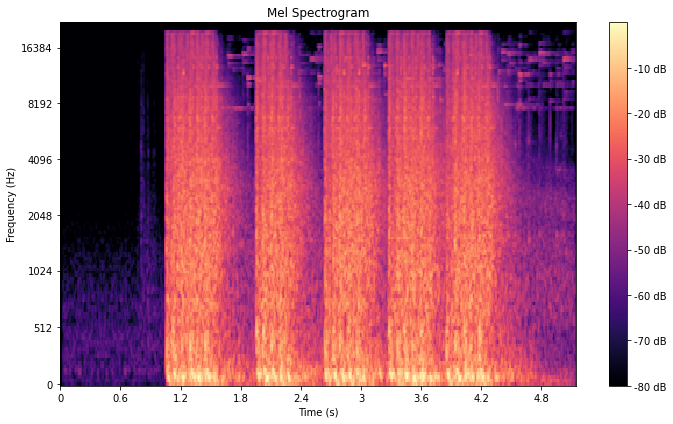

In [ ]:


import librosa
import librosa.display
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import IPython.display as ipd
import matplotlib.pyplot as plt

# Load and preprocess a particular audio file
audio_file_path = "D:/gro_0m_center_0526.wav"  # Replace with the path to your audio file
audio, sr = librosa.load(audio_file_path, sr=None)

# Play the audio
ipd.display(ipd.Audio(data=audio, rate=sr))

# Step 1: Extract audio features using the same function defined in the original code
def extract_audio_features(audio):
    # Extract MFCCs (Mel-frequency cepstral coefficients) as audio features
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    return mfccs.flatten()

# Step 2: Pad the extracted features to the same length as the maximum feature length obtained during training
max_feature_length = 15652 # Replace with the value obtained during training
audio_feature = extract_audio_features(audio)
padded_feature = pad_sequences([audio_feature], maxlen=max_feature_length, padding='post', dtype=np.float32)

# Step 3: Use the trained random forest model to make predictions on the audio features
predicted_class = rf_model.predict(padded_feature)[0]

# Step 4: Print the predicted class label
print("Predicted Class Label:", predicted_class)

# Step 5: Obtain and display the spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Display the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sr, hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()
